# Example 1: Independent photons with Gaussian spectral amplitudes

In [89]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
from main import GaussianPulse, IndependentGaussianCoincidence

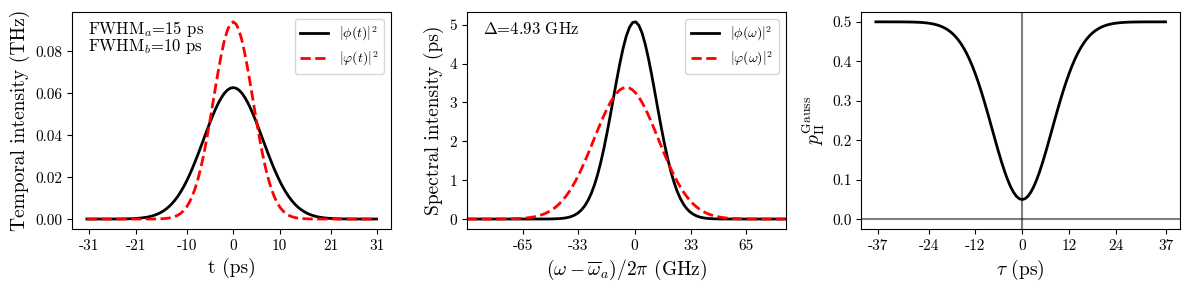

In [91]:
# set first Gaussian parameters
gaussian_a_params = {'lambda_c': 780,  # center wavelength (nm)
                     'FWHM': 15  # Full-Width-Half-Max (ps)
                     }
# set second Gaussian parameters
gaussian_b_params = {'lambda_c': 780.01,  # center wavelength (nm)
                     'FWHM': 10,  # Full-Width-Half-Max (ps)
                     }

# create two Gaussian objects
gaussian_a = GaussianPulse(gaussian_a_params)
gaussian_b = GaussianPulse(gaussian_b_params)

# set Gaussian coincidence parameters 
gaussian_coincidence_params = {'gaussian_a': gaussian_a,
                               'gaussian_b': gaussian_b
                               }

# create independent gaussian coincidence object
gaussian_coincidence = IndependentGaussianCoincidence(gaussian_coincidence_params)

# plot temporal and spectral intensity and coincidence probability
gaussian_coincidence.plot_coincidence()

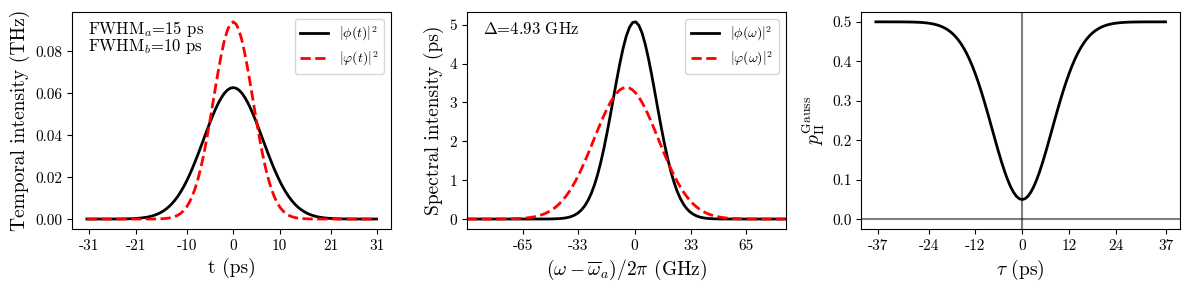

In [92]:
import matplotlib.pyplot as plt
import numpy as np
fs = 14  # font size
ts = 11  # tick size
twopi = 2 * np.pi
def test_plot_coincidence(self = gaussian_coincidence):
    if self.gaussian_a.FWHM > self.gaussian_b.FWHM:
        tt = self.gaussian_a.time_range
        ww = self.gaussian_b.freq_range
    else:
        tt = self.gaussian_b.time_range
        ww = self.gaussian_a.freq_range
        
    omega_c = self.gaussian_a.omega_c
    t_lim = min(-np.min(tt), np.max(tt)) * 1e12
    t_ticks = np.round(np.linspace(-t_lim, t_lim, 7), 0)
    
    f_lim = max(-np.min(ww- omega_c), np.max(ww- omega_c))* 1e-9 / twopi
    f_ticks = np.round(np.linspace(-f_lim, f_lim, 7), 0)
    
    tau_lim = min(-np.min(self.delay_range), np.max(self.delay_range)) * 1e12
    tau_ticks = np.round(np.linspace(-tau_lim, tau_lim, 7), 0)
    
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
    ax[0].plot(tt * 1e12, np.abs(self.gaussian_a.amplitude_time(tt)) ** 2 * 1e-12,
               linewidth=2,
               label=r'$|\phi(t)|^2$',
               color='black',
               )
    ax[0].plot(tt * 1e12, np.abs(self.gaussian_b.amplitude_time(tt)) ** 2 * 1e-12,
               linewidth=2,
               label=r'$|\varphi(t)|^2$',
               color='red',
               linestyle='--',
               )
    ax[0].set_xlabel("t (ps)", fontsize=fs)
    ax[0].set_ylabel("Temporal intensity (THz)", fontsize=fs)
    ax[0].tick_params(axis='both', labelsize=ts)
    ax[0].text(0.05, 0.9, f'$\mathrm{{FWHM}}_a$={self.gaussian_a.FWHM} ps', fontsize=12,transform=ax[0].transAxes)
    ax[0].text(0.05, 0.82, f'$\mathrm{{FWHM}}_b$={self.gaussian_b.FWHM} ps', fontsize=12,transform=ax[0].transAxes)
    ax[0].set_xticks(t_ticks)
    ax[0].legend()

    ax[1].plot((ww - self.gaussian_a.omega_c) * 1e-9 / twopi, np.abs(self.gaussian_a.amplitude_freq(ww)) ** 2 * 1e12,
               linewidth=2,
               label=r'$|\phi(\omega)|^2$',
               color='black',
               )
    ax[1].plot((ww - self.gaussian_a.omega_c) * 1e-9 / twopi, np.abs(self.gaussian_b.amplitude_freq(ww)) ** 2 * 1e12,
               linewidth=2,
               label=r'$|\varphi(\omega)|^2$',
               color='red',
               linestyle='--',
               )
    ax[1].set_xlabel(r"$(\omega - \overline{\omega}_a)/2\pi$ (GHz)", fontsize=fs)
    ax[1].set_ylabel("Spectral intensity (ps)", fontsize=fs)
    ax[1].tick_params(axis='both', labelsize=ts)
    D = (self.gaussian_a.omega_c - self.gaussian_b.omega_c) * 1e-9 / twopi
    ax[1].text(0.05, 0.9, f'$\Delta$={D:.2f} GHz', fontsize=12,transform=ax[1].transAxes)
    ax[1].set_xticks(f_ticks)
    ax[1].set_xlim(min(ww - self.gaussian_a.omega_c)* 1e-9 / twopi, max(ww - self.gaussian_a.omega_c)* 1e-9 / twopi )
    ax[1].legend()

    ax[2].plot(self.delay_range * 1e12, self.coincidence_probability(self.delay_range),
               linewidth=2,
               color='black')
    ax[2].set_xlabel(r"$\tau$ (ps)", fontsize=fs)
    ax[2].set_ylabel(r"$p_\mathrm{II}^\mathrm{Gauss}$", fontsize=fs)
    ax[2].tick_params(axis='both', labelsize=ts)
    ax[2].axhline(0, color='black', alpha=0.5)
    ax[2].axvline(0, color='black', alpha=0.5)
    ax[2].set_xticks(tau_ticks)

    plt.tight_layout()
    fig.savefig('figures/fig2.png', dpi=300, bbox_inches='tight')
    plt.show()
        
test_plot_coincidence()